In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
def load_all_images(path):
    images = []
    for image in glob.glob(path+"/*.jpg"):
        img = cv2.imread(image)
        images.append(img)
    return images

In [3]:
images = load_all_images("original_images")

In [9]:
def_image2BGR(image):
    h,w,c = image.shape
    h = int(h/3)
    b = img[0:h_,...]
    g = img[h_:2*h_,...]
    r = img[2*h_:3*h_,...]
    return(b,g,r)

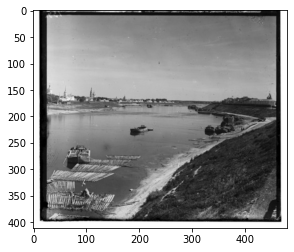

In [24]:
plt.imshow(r)

In [20]:
def ssd(image1, image2):
    return np.sum(np.sum((image1-image2)**2))

In [22]:
ssd(b,r)

60651084

In [25]:
b.shape

(411, 480, 3)